## hw3 p1

In [19]:
import numpy as np
import cvxpy as cp

A = np.array([[1, 2, 0, 1], [0, 0, 3, 1], [0, 3, 1, 1], [2, 1, 2, 5], [1, 0, 3, 2]])
c_max = np.ones(5) * 100
p = np.array([3, 2, 7, 6])
p_disc = np.array([2, 1, 4, 2])
q = np.array([4, 10, 5, 10])

z = cp.Variable(4)
x = cp.Variable(4)

objective = cp.Maximize(cp.sum(z))
constraints = [A @ x <= c_max, cp.multiply(p, x) >= z, cp.multiply(p_disc, x-q) >= z, x >= 0]
problem = cp.Problem(objective, constraints)
problem.solve()

103.53846153713614

In [20]:
x.value

array([7.69230769e+00, 2.30769231e+01, 3.07692308e+01, 2.25273479e-10])

In [21]:
z.value

array([  7.38461538,  13.07692308, 103.07692308, -20.        ])

In [22]:
z.value / x.value 

array([ 9.60000000e-01,  5.66666667e-01,  3.35000000e+00, -8.87809791e+10])

Total revenue: 103.53846153713614
Each revenue: 7.38461538,  13.07692308, 103.07692308, -20.
optimal activity levels: 7.69230769e+00, 2.30769231e+01, 3.07692308e+01, 2.25273479e-10
ratio: 9.60000000e-01,  5.66666667e-01,  3.35000000e+00, -8.87809791e+10

Comment: It seems that the fourth activity level is close to 0, which indicates inactivity. It is clear though that the first, second, and third activity levels are high enough to exceed discount level.

## hw3 p2

In [74]:
# (a)
x = cp.Variable(5)
y = cp.Variable(5)
constraints = [cp.norm(x + cp.multiply(2, y)) <= 5, cp.norm(x - y) <= 3]

# (b)
x = cp.Variable()
y = cp.Variable()
constraints = [cp.square(cp.square(x+y)) <= x-y]

# (c)
constriants = [x >= 0, y >= 0, cp.inv_pos(x) + cp.inv_pos(y) <= 1]

# (d)
x = cp.Variable(5)
y = cp.Variable(5)
constraints = [cp.norm(cp.maximum(x, 1), 2) + cp.norm(cp.maximum(y, 2), 2) <= 3 * cp.sum(x) + cp.sum(y)]

# (e)
constraints = [cp.inv_pos(x)-y <= 0, x >= 0, y >= 0]

# (f)
x = cp.Variable()
y = cp.Variable()
constraints = [cp.quad_over_lin(x+y, cp.sqrt(y)) <= x - y + 5]

# (g)
constraints = [cp.power(x, 3) + cp.power(y, 3) <= 1, x >= 0, y >= 0]

# (h)
z = cp.Variable()
constraints = [x + z <= 1 + cp.geo_mean(cp.vstack([y, x - cp.quad_over_lin(z, y)])), x >= 0, y >= 0]

## hw4 p2 (c)

In [274]:
import cvxpy as cp
import numpy as np

m,n = 30, 100
x = cp.Variable(shape = n, complex=True)
A_1 = np.random.randn(m,n)
A_2 = np.random.randn(m,n)
A = A_1 + 1j * A_2
b_1 = np.random.randn(m,1)
b_2 = np.random.randn(m,1)
b = b_1 + 1j * b_2

objective = cp.Minimize(cp.norm(x,2))
constraints = [(A_1 @ cp.real(x)).reshape((30,1)) - (A_2 @ cp.imag(x)).reshape((30,1)) == b_1, (A_1 @ cp.imag(x)).reshape((30,1)) + (A_2 @ cp.real(x)).reshape((30,1)) == b_2]

In [275]:
problem = cp.Problem(objective, constraints)
problem.solve()


0.5390648562855884

In [276]:
x_real = np.real(x.value)
x_imag = np.imag(x.value)


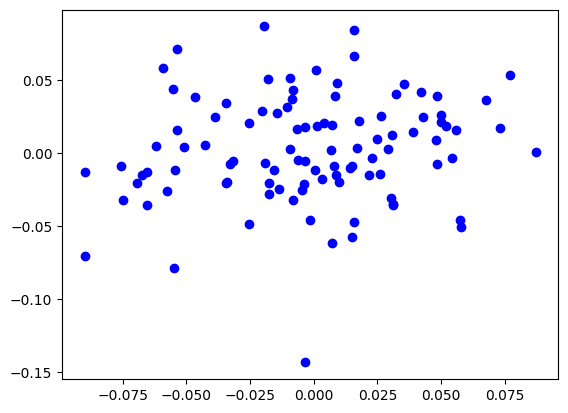

In [280]:
plt.scatter(x_real, x_imag, color='blue', marker='o')


In [281]:
import cvxpy as cp
import numpy as np

objective = cp.Minimize(cp.norm(x,"inf"))
constraints = [(A_1 @ cp.real(x)).reshape((30,1)) - (A_2 @ cp.imag(x)).reshape((30,1)) == b_1, (A_1 @ cp.imag(x)).reshape((30,1)) + (A_2 @ cp.real(x)).reshape((30,1)) == b_2]

In [283]:
problem = cp.Problem(objective, constraints)
problem.solve()


0.06486964197483668

In [284]:
x_real = np.real(x.value)
x_imag = np.imag(x.value)


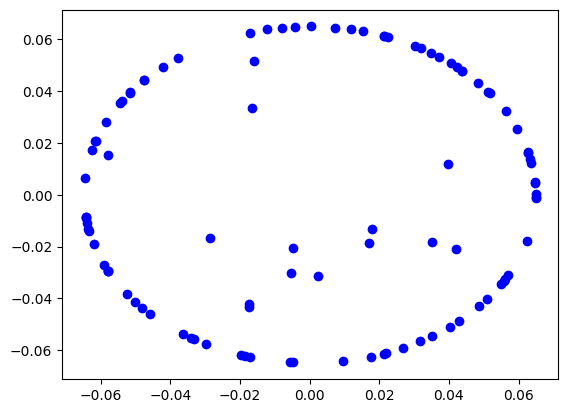

In [285]:
plt.scatter(x_real, x_imag, color='blue', marker='o')


## hw4 P3 (a)

In [4]:
import cvxpy as cp
import numpy as np

# Define variables
x = cp.Variable()
y = cp.Variable()

P = np.array([[1, -0.5],
              [-0.5, 2]])

# Objective function
xy_vector = cp.vstack([x, y])

objective = cp.Minimize(cp.quad_form(xy_vector, P) - x)

# Attempting a DCP-compliant constraint inspired by the original idea
# Note: This is just illustrative and does not directly replicate the non-DCP compliant form
constraints = [x+2*y<=-2, x-4*y<=-3, 5*x+76*y<=1]

# Define and solve the problem
problem = cp.Problem(objective, constraints)

problem.solve()
print(f"Optimal x: {x.value}, Optimal y: {y.value}")

Optimal x: -2.333333333333334, Optimal y: 0.16666666666666674


In [6]:
problem.value

8.222222222222225

In [106]:
for i, constraint in enumerate(constraints):
    print(f"Dual solution for constraint {i+1}: {constraint.dual_value}")

Dual solution for constraint 1: 2.5491946099767695
Dual solution for constraint 2: 3.0217342611965297
Dual solution for constraint 3: 0.05248089243200761


In [9]:
lambda_1 = 2.5491946099767695
lambda_2 = 3.0217342611965297
lambda_3 = 0.05248089243200761

x_1 = -2.333333333333334
x_2 = 0.16666666666666674

Checking KKT

In [109]:
2 * x_1 - x_2 -1 + lambda_1 + lambda_2 + 5 * lambda_3 

2.3869795029440866e-15

In [110]:
4 * x_2 - x_1 + 2 * lambda_1 - 4 * lambda_2 + 76 * lambda_3

-1.3322676295501878e-15

(b)

In [18]:
problem.value + lambda_1 * 0.1 - lambda_2 * 0.1

8.174968257100248

In [30]:
import cvxpy as cp
import numpy as np

# Define variables
x = cp.Variable()
y = cp.Variable()

P = np.array([[1, -0.5],
              [-0.5, 2]])

# Objective function
xy_vector = cp.vstack([x, y])

objective = cp.Minimize(cp.quad_form(xy_vector, P) - x)

# Attempting a DCP-compliant constraint inspired by the original idea
# Note: This is just illustrative and does not directly replicate the non-DCP compliant form
constraints = [x+2*y<=-1.9, x-4*y<=-3.0, 5*x+76*y<=1]

# Define and solve the problem
problem = cp.Problem(objective, constraints)

problem.solve()
problem.value

8.222222222222225

## hw4 problem 5

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


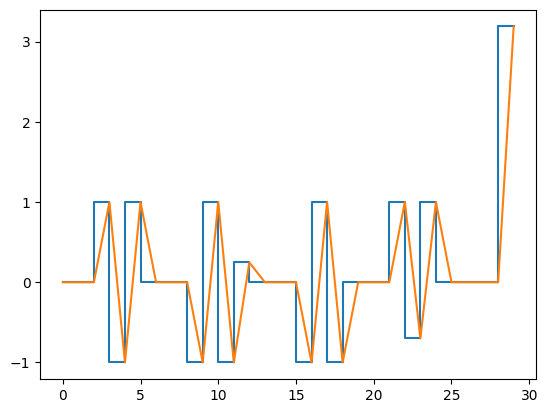

In [170]:
import cvxpy as cp
import numpy as np

t = cp.Variable(30)
u = cp.Variable(30)
y = cp.Variable(30)

A = np.array([[-1, 0.4, 0.8], [1, 0, 0], [0, 1, 0]])
b = np.array([1, 0, 0.3])
x_des = np.array([7,2,-6])
N = 30
H = []

for i in range(N):
    # Compute A raised to the (N-1-i) power and multiply by b
    H.append(np.dot(np.linalg.matrix_power(A, N-1-i), b))


objective = cp.Minimize(cp.sum(t))
constraints = [-y <= u, u <= y, t >= y, t >= 2 * y - np.ones(30), H @ u == x_des]
problem = cp.Problem(objective, constraints)
problem.solve()

import matplotlib.pyplot as plt

plt.step(range(30), u.value, where='pre')  # 'pre' indicates that the step occurs before the value
plt.plot(u.value)

## hw5 q4

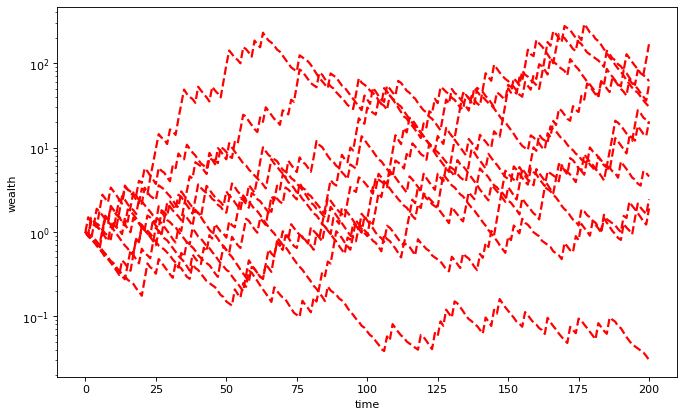

In [334]:
import numpy as np
from cvxpy import *
import matplotlib.pyplot as plt

P = np.array(np.mat(
    '3.5000    1.1100    1.1100    1.0400    1.0100;\
     0.5000    0.9700    0.9800    1.0500    1.0100;\
     0.5000    0.9900    0.9900    0.9900    1.0100;\
     0.5000    1.0500    1.0600    0.9900    1.0100;\
     0.5000    1.1600    0.9900    1.0700    1.0100;\
     0.5000    0.9900    0.9900    1.0600    1.0100;\
     0.5000    0.9200    1.0800    0.9900    1.0100;\
     0.5000    1.1300    1.1000    0.9900    1.0100;\
     0.5000    0.9300    0.9500    1.0400    1.0100;\
     3.5000    0.9900    0.9700    0.9800    1.0100'))

m=P.shape[0];
n=P.shape[1];
x_unif = np.ones(n)/n; # uniform resource allocation

#################################################################
# INSERT YOUR CODE HERE
# Solve the log-optimal investment problem
# assuming all events are equiprobable.
# Store your result in the variable x_opt

#Find log-optimal investment policy

#################################################################

np.random.seed(10);
N = 10;  # number of random trajectories 
T = 200; # time horizon
w_opt = np.zeros((N,T+1))
w_unif = np.zeros((N,T+1))
for i in range(N):
	events = np.floor(np.random.rand(T)*m)
	events = events.astype(int)    
	P_event = P[events,:]
#	w_opt[i,:] = np.append(1, np.cumprod(P_event.dot(x_opt)))
	w_unif[i,:] = np.append(1, np.cumprod(P_event.dot(x_unif)))

plt.figure(figsize=(10, 6), dpi=80)
plt.xlabel('time')
plt.ylabel('wealth')
plt.gca().set_yscale('log')
#plt.plot(range(T+1), np.transpose(w_opt), color="green", linewidth=2.0)
plt.plot(range(T+1), np.transpose(w_unif), color="red", linewidth=2.0, linestyle='--')
plt.show()

In [336]:
P

array([[3.5 , 1.11, 1.11, 1.04, 1.01],
       [0.5 , 0.97, 0.98, 1.05, 1.01],
       [0.5 , 0.99, 0.99, 0.99, 1.01],
       [0.5 , 1.05, 1.06, 0.99, 1.01],
       [0.5 , 1.16, 0.99, 1.07, 1.01],
       [0.5 , 0.99, 0.99, 1.06, 1.01],
       [0.5 , 0.92, 1.08, 0.99, 1.01],
       [0.5 , 1.13, 1.1 , 0.99, 1.01],
       [0.5 , 0.93, 0.95, 1.04, 1.01],
       [3.5 , 0.99, 0.97, 0.98, 1.01]])

In [520]:
import cvxpy as cp
import numpy as np

pi = 0.2
x = cp.Variable(5)
y = cp.Variable(10)

objective = cp.Minimize(-1 * cp.sum(pi * cp.log(y)))
constraints = [y == P @ x, x >= 0, cp.sum(x) == 1]
problem = cp.Problem(objective, constraints)
problem.solve()


-0.04615664164121254

In [521]:
x.value

array([5.79742770e-02, 3.99982933e-01, 2.92272272e-01, 2.49770515e-01,
       3.25597771e-09])

In [369]:
np.sum(np.log(P @ np.array([0.2, 0.2, 0.2, 0.2, 0.2]))) * 0.1

0.011370774818392005

## hw5 p6

In [410]:
n=100
m=300
A = np.random.rand(m,n)
b = np.dot(A, np.ones(n)/2)
c = -1 * np.random.rand(n,1)

In [412]:
x = cp.Variable(100)
objective = cp.Minimize(c.T @ x)
constraints = [x >= 0, x <= 1, A @ x <= b]
problem = cp.Problem(objective, constraints)
problem.solve()

-32.63271047106321

hw6 p1

In [623]:
t = np.array([-3 + 6 * (i-1)/200 for i in range(1, 202)])
y = np.array([np.exp(t[i]) for i in range(201)])

u=1
l=0

M = (u+l)/2

while (u-l > 0.001):
    a = cp.Variable(3)
    b = cp.Variable(2)
    objective = cp.Minimize(1)

    constraints = [a[0] + a[1] * t[i] + a[2] * (t[i] ** 2) <= (M + y[i]) * (1 + b[0] * t[i] + b[1] * (t[i] ** 2)) for i in range(201)] + [-1 * (a[0] + a[1] * t[i] + a[2] * (t[i] ** 2)) <= (M - y[i]) * (1 + b[0] * t[i] + b[1] * (t[i] ** 2)) for i in range(201)]

    problem = cp.Problem(objective, constraints)

    if problem.solve() == 1:
        u = M
    else:
        l = M
    M = (u+l)/2


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


In [628]:
a = cp.Variable(3)
b = cp.Variable(2)
objective = cp.Minimize(1)
M = 0.02294921875
constraints = [a[0] + a[1] * t[i] + a[2] * (t[i] ** 2) <= (M + y[i]) * (1 + b[0] * t[i] + b[1] * (t[i] ** 2)) for i in range(201)] + [-1 * (a[0] + a[1] * t[i] + a[2] * (t[i] ** 2)) <= (M - y[i]) * (1 + b[0] * t[i] + b[1] * (t[i] ** 2)) for i in range(201)]

problem = cp.Problem(objective, constraints)


In [629]:
print(problem.solve())
print(a.value)
print(b.value)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/cvxpy/reductions/solvers/solving_chain.py:336: FutureWarning: 
    Your problem is being solved with the ECOS solver by default. Starting in 
    CVXPY 1.5.0, Clarabel will be used as the default solver instead. To continue 
    using ECOS, specify the ECOS solver explicitly using the ``solver=cp.ECOS`` 
    argument to the ``problem.solve`` method.
    
  warnings.warn(ECOS_DEPRECATION_MSG, FutureWarning)


1.0
[1.00977826 0.61238364 0.11357529]
[-0.41439101  0.04844551]


## Optimal value

In [631]:
np.max(np.abs(np.array([(a.value[0]+a.value[1] * t + a.value[2] * (t ** 2))/(1 + b.value[0] * t + b.value[1] * (t ** 2))])-y))

0.02292352483754557

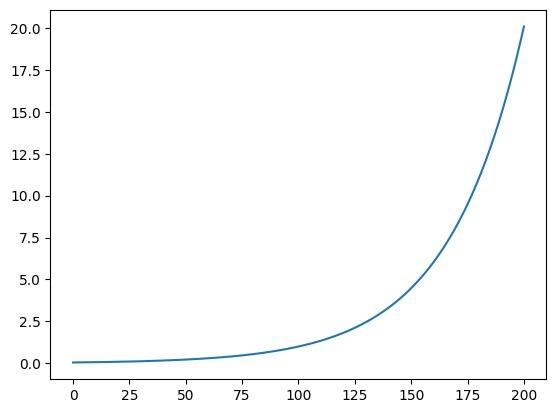

In [637]:
import matplotlib.pyplot as plt

plt.plot(y)

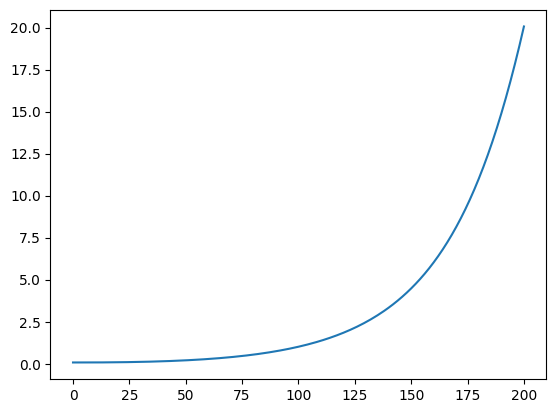

In [636]:
plt.plot(np.array([(a.value[0]+a.value[1] * t[i] + a.value[2] * (t[i] ** 2))/(1 + b.value[0] * t[i] + b.value[1] * (t[i] ** 2)) for i in range(201)]))

## Almost same!!

hw6 q2

In [639]:
import numpy as np

# Given values
n = 10
m = 45
m_test = 45
sigma = 0.250

# Training data in Python using a NumPy array
train = np.array([
    [1, 2, 1],
    [1, 3, 1],
    [1, 4, 1],
    [1, 5, 1],
    [1, 6, 1],
    [1, 7, 1],
    [1, 8, 1],
    [1, 9, 1],
    [1, 10, 1],
    [2, 3, -1],
    [2, 4, -1],
    [2, 5, -1],
    [2, 6, -1],
    [2, 7, -1],
    [2, 8, -1],
    [2, 9, -1],
    [2, 10, -1],
    [3, 4, 1],
    [3, 5, -1],
    [3, 6, -1],
    [3, 7, 1],
    [3, 8, 1],
    [3, 9, 1],
    [3, 10, 1],
    [4, 5, -1],
    [4, 6, -1],
    [4, 7, 1],
    [4, 8, 1],
    [4, 9, -1],
    [4, 10, -1],
    [5, 6, 1],
    [5, 7, 1],
    [5, 8, 1],
    [5, 9, -1],
    [5, 10, 1],
    [6, 7, 1],
    [6, 8, 1],
    [6, 9, -1],
    [6, 10, -1],
    [7, 8, 1],
    [7, 9, 1],
    [7, 10, -1],
    [8, 9, -1],
    [8, 10, -1],
    [9, 10, 1],
])

# Test data in Python using a NumPy array
test = np.array([
    [1, 2, 1],
    [1, 3, 1],
    [1, 4, 1],
    [1, 5, 1],
    [1, 6, 1],
    [1, 7, 1],
    [1, 8, 1],
    [1, 9, 1],
    [1, 10, 1],
    [2, 3, -1],
    [2, 4, 1],
    [2, 5, -1],
    [2, 6, -1],
    [2, 7, -1],
    [2, 8, 1],
    [2, 9, -1],
    [2, 10, -1],
    [3, 4, 1],
    [3, 5, -1],
    [3, 6, 1],
    [3, 7, 1],
    [3, 8, 1],
    [3, 9, -1],
    [3, 10, 1],
    [4, 5, -1],
    [4, 6, -1],
    [4, 7, -1],
    [4, 8, 1],
    [4, 9, -1],
    [4, 10, -1],
    [5, 6, -1],
    [5, 7, 1],
    [5, 8, 1],
    [5, 9, 1],
    [5, 10, 1],
    [6, 7, 1],
    [6, 8, 1],
    [6, 9, 1],
    [6, 10, 1],
    [7, 8, 1],
    [7, 9, -1],
    [7, 10, 1],
    [8, 9, -1],
    [8, 10, -1],
    [9, 10, 1],
])

In [649]:
a = cp.Variable(n)

objective = cp.Maximize(cp.sum([cp.log_normcdf((train[i][2] * (a[train[i][0]-1]-a[train[i][1]-1]))/sigma) for i in range(len(train))]))
constraints = [0 <= a, a <= 1]
problem = cp.Problem(objective, constraints)
problem.solve()

-11.430294646964967

In [651]:
test.shape

(45, 3)

In [675]:
Result_c = [1 if a.value[test[i][0]-1] > a.value[test[i][1]-1] else -1 for i in range(45)]

In [679]:
Result_t = [train[i][2] for i in range(45)]

In [676]:
Result_r = [test[i][2] for i in range(45)]

In [684]:
sum([1 if Result_c[i] == Result_r[i] else 0 for i in range(45)])

34

In [685]:
sum([1 if Result_t[i] == Result_r[i] else 0 for i in range(45)])

34

## hw6 q3

In [694]:
x = [
    0.000, 0.010, 0.020, 0.030, 0.040, 0.051, 0.061, 0.071, 0.081, 0.091,
    0.101, 0.111, 0.121, 0.131, 0.141, 0.152, 0.162, 0.172, 0.182, 0.192,
    0.202, 0.212, 0.222, 0.232, 0.242, 0.253, 0.263, 0.273, 0.283, 0.293,
    0.303, 0.313, 0.323, 0.333, 0.343, 0.354, 0.364, 0.374, 0.384, 0.394,
    0.404, 0.414, 0.424, 0.434, 0.444, 0.455, 0.465, 0.475, 0.485, 0.495,
    0.505, 0.515, 0.525, 0.535, 0.545, 0.556, 0.566, 0.576, 0.586, 0.596,
    0.606, 0.616, 0.626, 0.636, 0.646, 0.657, 0.667, 0.677, 0.687, 0.697,
    0.707, 0.717, 0.727, 0.737, 0.747, 0.758, 0.768, 0.778, 0.788, 0.798,
    0.808, 0.818, 0.828, 0.838, 0.848, 0.859, 0.869, 0.879, 0.889, 0.899,
    0.909, 0.919, 0.929, 0.939, 0.949, 0.960, 0.970, 0.980, 0.990, 1.000
]

y = [
    0.200, 0.117, 0.041, -0.029, -0.093, -0.152, -0.204, -0.252, -0.295, -0.334,
    -0.369, -0.400, -0.428, -0.453, -0.475, -0.495, -0.513, -0.529, -0.545, -0.559,
    -0.573, -0.586, -0.600, -0.614, -0.628, -0.641, -0.653, -0.663, -0.671, -0.675,
    -0.676, -0.672, -0.664, -0.650, -0.630, -0.606, -0.577, -0.544, -0.509, -0.473,
    -0.436, -0.399, -0.364, -0.330, -0.300, -0.273, -0.250, -0.229, -0.211, -0.194,
    -0.179, -0.164, -0.149, -0.134, -0.118, -0.100, -0.080, -0.059, -0.035, -0.010,
    0.017, 0.045, 0.074, 0.104, 0.135, 0.167, 0.200, 0.233, 0.267, 0.301,
    0.336, 0.371, 0.408, 0.444, 0.482, 0.521, 0.560, 0.600, 0.641, 0.683,
    0.726, 0.770, 0.814, 0.860, 0.906, 0.953, 1.001, 1.050, 1.100, 1.151,
    1.202, 1.254, 1.307, 1.361, 1.416, 1.471, 1.527, 1.584, 1.642, 1.700
]


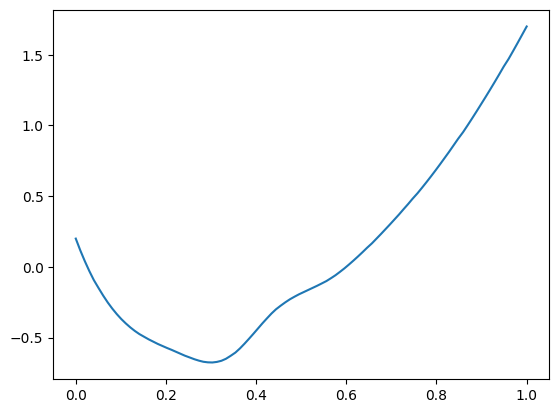

In [698]:
plt.plot(x,y)

In [732]:
alpha = cp.Variable()
beta = cp.Variable()

objective = cp.Minimize(cp.sum([ (alpha * x[i] + beta - y[i]) ** 2 for i in range(len(x))]))

problem = cp.Problem(objective, constraints)

problem.solve()

12.74074376455178

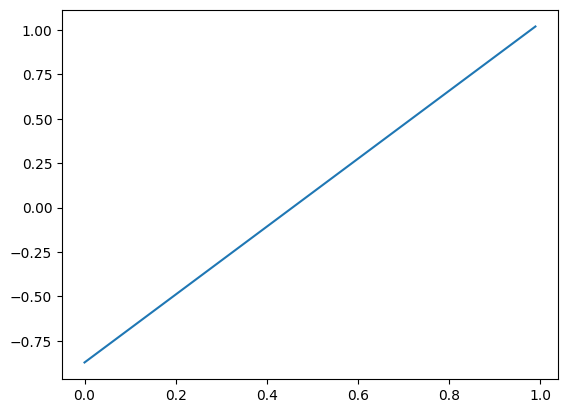

In [733]:
plt.plot(np.arange(0,1,0.01), alpha.value * np.arange(0,1,0.01) + beta.value)

In [703]:
alpha = cp.Variable(2)
beta = cp.Variable(2)

objective = cp.Minimize(cp.sum([ (alpha[0] * x[i] + beta[0] - y[i] if x[i]<0.5 else alpha[1] * x[i] + beta[1] - y[i]) ** 2 for i in range(len(x))]))

constraints = [alpha[0] <= alpha[1], 0.5 * alpha[0] + beta[0] == 0.5 * alpha[1] + beta[1]]

problem = cp.Problem(objective, constraints)

problem.solve()

2.624273679631359

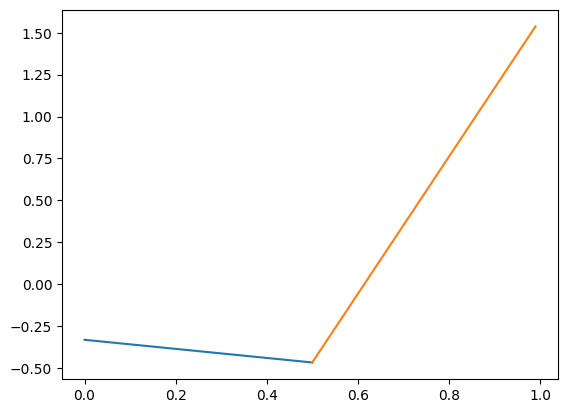

In [722]:
plt.plot(np.arange(0,0.51,0.01), alpha.value[0] * np.arange(0,0.51,0.01) + beta.value[0])
plt.plot(np.arange(0.5,1,0.01), alpha.value[1] * np.arange(0.5,1,0.01) + beta.value[1])

In [724]:
alpha = cp.Variable(3)
beta = cp.Variable(3)

# Objective
objective_terms = [
    cp.square(alpha[0]*x[i] + beta[0] - y[i]) for i in range(len(x)) if x[i] < 1/3
] + [
    cp.square(alpha[1]*x[i] + beta[1] - y[i]) for i in range(len(x)) if 1/3 <= x[i] < 2/3
] + [
    cp.square(alpha[2]*x[i] + beta[2] - y[i]) for i in range(len(x)) if x[i] >= 2/3
]

objective = cp.Minimize(cp.sum(objective_terms))

constraints = [alpha[0] <= alpha[1], alpha[1] <= alpha[2], 1/3 * alpha[0] + beta[0] == 1/3 * alpha[1] + beta[1], 2/3 * alpha[1] + beta[1] == 2/3 * alpha[2] + beta[2]]

problem = cp.Problem(objective, constraints)

problem.solve()

0.600565768079377

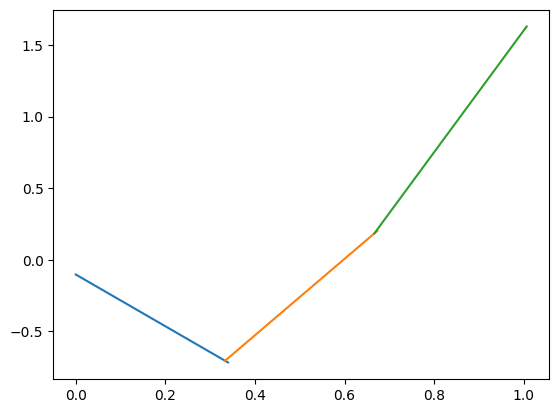

In [726]:
plt.plot(np.arange(0,1/3+0.01, 0.01), alpha.value[0] * np.arange(0,1/3+0.01, 0.01) + beta.value[0])
plt.plot(np.arange(1/3,2/3+0.01, 0.01), alpha.value[1] * np.arange(1/3,2/3+0.01, 0.01) + beta.value[1])
plt.plot(np.arange(2/3,1.01,0.01), alpha.value[2] * np.arange(2/3,1.01,0.01) + beta.value[2])

In [727]:
alpha = cp.Variable(4)
beta = cp.Variable(4)

# Objective
objective_terms = [
    cp.square(alpha[0]*x[i] + beta[0] - y[i]) for i in range(len(x)) if x[i] < 1/4
] + [
    cp.square(alpha[1]*x[i] + beta[1] - y[i]) for i in range(len(x)) if 1/4 <= x[i] < 2/4
] + [
    cp.square(alpha[2]*x[i] + beta[2] - y[i]) for i in range(len(x)) if 2/4 <= x[i] < 3/4
] + [
    cp.square(alpha[3]*x[i] + beta[3] - y[i]) for i in range(len(x)) if x[i] >= 3/4
]

objective = cp.Minimize(cp.sum(objective_terms))

constraints = [alpha[0] <= alpha[1], alpha[1] <= alpha[2], alpha[2] <= alpha[3], 1/4 * alpha[0] + beta[0] == 1/4 * alpha[1] + beta[1], 2/4 * alpha[1] + beta[1] == 2/4 * alpha[2] + beta[2], 3/4 * alpha[2] + beta[2] == 3/4 * alpha[3] + beta[3]]

problem = cp.Problem(objective, constraints)

problem.solve()

0.2192852500955145

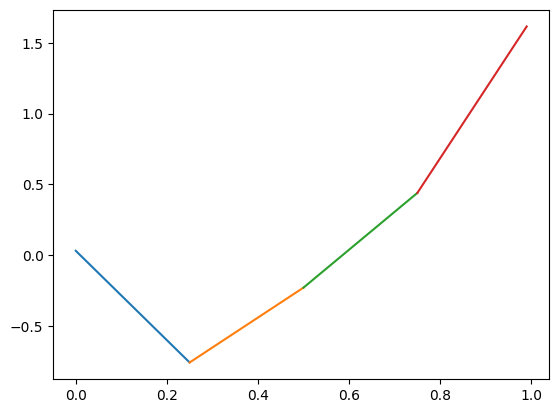

In [731]:
plt.plot(np.arange(0,1/4+0.01, 0.01), alpha.value[0] * np.arange(0,1/4+0.01, 0.01) + beta.value[0])
plt.plot(np.arange(1/4,2/4+0.01, 0.01), alpha.value[1] * np.arange(1/4,2/4+0.01, 0.01) + beta.value[1])
plt.plot(np.arange(2/4,3/4+0.01,0.01), alpha.value[2] * np.arange(2/4,3/4+0.01,0.01) + beta.value[2])
plt.plot(np.arange(3/4,1,0.01), alpha.value[3] * np.arange(3/4,1,0.01) + beta.value[3])

## hw6 p4 (b)

In [758]:
y.T.shape

(4,)

In [770]:
bar_A = np.array([[60, 45, -8], [90, 30, -30], [0, -8, -4], [30, 10, -10]])
b = np.array([-6, -3, 18, -9])
R = np.array([[0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5], [0.5, 0.5, 0.5]])

x = cp.Variable(3)
y = cp.Variable(4)
z = cp.Variable(3)

objective = cp.Minimize(cp.sum_squares(y))
constraints = [bar_A @ x + R @ z - b <= y, bar_A @ x - R @ z - b >= -1 * y, -z <= x, x <= z]
problem = cp.Problem(objective, constraints)
problem.solve()

328.7006557115506

In [772]:
np.max(np.abs(y.value))

15.588066368857687

residual norm is given as a square root of 328.700 and the worst case residual is 15.588

In [769]:
bar_A = np.array([[60, 45, -8], [90, 30, -30], [0, -8, -4], [30, 10, -10]])
b = np.array([-6, -3, 18, -9])

x = cp.Variable(3)


objective = cp.Minimize(cp.sum_squares(bar_A @ x - b))
problem = cp.Problem(objective)
problem.solve()

57.60000000000218

In [773]:
np.max(np.abs(y.value))

15.588066368857687

Residual norm is given as a square root of 57.600 and the worst case residual is same as the above.

## hw6 p6

In [59]:
import numpy as np

V = np.random.randn(5, 20)

In [78]:
import cvxpy as cp

lmbda = cp.Variable(20)
summ = cp.Variable(shape = (5,5))

objective = cp.Minimize(cp.tr_inv(summ))
constraints = [summ == V @ cp.diag(lmbda) @ V.T, cp.sum(lmbda) == 1, lmbda >= 0.01]
problem = cp.Problem(objective, constraints)
problem.solve()

7.620638228144764

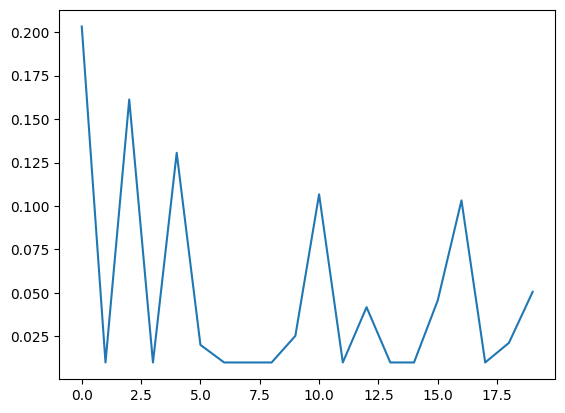

In [70]:
import matplotlib.pyplot as plt

plt.plot(lmbda.value)

In [75]:
print(np.rint(30 * lmbda.value))
print(30 * lmbda.value)

[6. 0. 5. 0. 4. 1. 0. 0. 0. 1. 3. 0. 1. 0. 0. 1. 3. 0. 1. 2.]
[6.09840813 0.30002526 4.83892087 0.29993307 3.91834481 0.60344282
 0.29999215 0.30000029 0.29986115 0.75922359 3.20160723 0.29987954
 1.25410739 0.30012161 0.29999052 1.37125823 3.09740185 0.29996651
 0.63884204 1.51867283]


array([6., 1., 5., 0., 4., 1., 0., 0., 0., 1., 3., 0., 1., 0., 0., 2., 3.,
       0., 1., 2.])


Lower bound: 7.620638228144764


In [76]:
import cvxpy as cp

lmbda = np.array([6., 1., 5., 0., 4., 1., 0., 0., 0., 1., 3., 0., 1., 0., 0., 2., 3.,
       0., 1., 2.])
summ = cp.Variable(shape = (5,5))

objective = cp.Minimize(cp.tr_inv(summ))
constraints = [summ == V @ cp.diag(lmbda) @ V.T]
problem = cp.Problem(objective, constraints)
problem.solve()

0.25324891203125927

In [79]:
0.25324891203125927 * 30

7.597467360937778

Upper bound: 7.597467360937778

The point is that the upper bound - lower bound is relatively small, so the approximation is pretty accurate.